#Comparison of MIR Spectral Features with SED Luminosities

This notebook explores the relationship between the MIR spectral features measured from the Spitzer/IRS low-resolution spectra and the luminosities measured from the broadband SED's. Essentially if we've reasonably decomposed the SEDs into an AGN and star-forming component then we expect a nice correlation between the PAH features as well as NeII emission line and the FIR luminosity.

In [1]:
# Standard module imports
import numpy as np
import scipy.stats as stats
import pandas as pd
import sys
import pickle
%matplotlib inline

# Useful directories
gh_dir = '/Users/ttshimiz/Github/'
sed_fit_dir = gh_dir + 'bat-agn-sed-fitting/'
casey_dir = sed_fit_dir + 'analysis/casey_bayes_results/'
data_dir = gh_dir + 'bat-data/'

/Users/ttshimiz/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Setup the figures
execfile('../code/figure-setup.py')

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
# Upload the fitting results for the C12 model
bat_c12 = pd.read_csv('../data/bat-agn-c12-params.csv', index_col=0)

# Remove 'bad' sources
radio_loud_sources = np.array(['PICTORA', '3C111.0', '3C120',
                              '2MASXJ23272195+1524375', 'PKS2331-240',
                              'HB890241+622', 'Mrk3'])
bat_c12 = bat_c12.drop(radio_loud_sources)
bat_c12.loc['UGC06728', 'lir_sf'] += 2.0
bat_c12.loc['UGC06728', 'mdust'] += 2.0

# Upload the info for the BAT AGN (i.e. AGN type, luminosity distance, redshift, etc)
bat_info = pd.read_csv(data_dir+'bat_info.csv', index_col=0)
bat_info.loc['UGC06728', 'Dist_[Mpc]'] = 292.0

bat_flux = pd.read_csv(data_dir+'bat_bat_flux.csv', index_col=0)
bat_flux['bat_flux_err_low'] = bat_flux['BAT_flux'] - bat_flux['BAT_flux_90_low']
bat_flux['bat_flux_err_high'] = bat_flux['BAT_flux_90_high'] - bat_flux['BAT_flux']
bat_flux['lbat'] = np.log10(4*np.pi*(bat_info['Dist_[Mpc]']*10**6*3.09e18)**2*bat_flux['BAT_flux']*10**(-12))
bat_flux['bat_err'] = np.max(np.vstack([bat_flux['bat_flux_err_low'], bat_flux['bat_flux_err_high']]), axis=0)
bat_flux['lbat_err'] = 0.434*4*np.pi*(bat_info['Dist_[Mpc]']*10**6*3.09e18)**2*bat_flux['bat_err']*10**(-12)/(10**bat_flux['lbat'])
bat_flux['lbat_flag'] = pd.Series(index=bat_flux.index)
bat_flux.loc[bat_flux['BAT_flux_90_high'] == 0, 'lbat_flag'] = 0
bat_flux.loc[bat_flux['BAT_flux_90_low'] != 0, 'lbat_flag'] = 1
bat_flux.loc[bat_flux['lbat_flag'] == 0, 'lbat_err'] = 0

In [4]:
# Upload the results from fitting the IRS spectra
f = open(gh_dir+'bat-agn-spitzer-irs-analysis/strengths_11-20-2015.pkl', 'rb')
strengths = pickle.load(f)
f.close()

In [5]:
# Extract the luminosities and equivalent widths for all of the features into Pandas DataFrames
df_lum = pd.DataFrame(columns=['PAH 11.3', 'PAH 11.3 err', 'PAH 7.7', 'PAH 7.7 err', 'PAH 6.2','PAH 6.2 err', 'NeII', 'NeII err', 'NeIII', 
                               'NeIII err', 'NeV', 'NeV err', 'OIV', 'OIV err'], index=strengths.keys(), dtype=np.float)
df_eqw = pd.DataFrame(columns=['PAH 11.3', 'PAH 11.3 err', 'PAH 7.7', 'PAH 7.7 err', 'PAH 6.2','PAH 6.2 err', 'NeII', 'NeII err', 'NeIII', 
                               'NeIII err', 'NeV', 'NeV err', 'OIV', 'OIV err'], index=strengths.keys(), dtype=np.float)

for n in df_eqw.index:
    df_eqw.loc[n, 'PAH 11.3'] = strengths[n]['PAH 11.3 Features']['PAH 11.3 Complex']['eqw'][0]
    df_eqw.loc[n, 'PAH 7.7'] = strengths[n]['PAH 7.7 Features']['PAH 7.7 Complex']['eqw'][0]
    df_eqw.loc[n, 'PAH 6.2'] = strengths[n]['PAH 6.2 Features']['PAH 6.22']['eqw'][0]
    df_eqw.loc[n, 'NeII'] = strengths[n]['NeII Features']['[NeII]']['eqw'][0]
    df_eqw.loc[n, 'NeIII'] = strengths[n]['NeIII Features']['[NeIII]']['eqw'][0]
    df_eqw.loc[n, 'NeV'] = strengths[n]['NeV Features']['[NeV]']['eqw'][0]
    df_eqw.loc[n, 'OIV'] = strengths[n]['OIV Features']['[OIV]']['eqw'][0]
    df_eqw.loc[n, 'PAH 11.3 err'] = strengths[n]['PAH 11.3 Features']['PAH 11.3 Complex']['eqw'][1]
    df_eqw.loc[n, 'PAH 7.7 err'] = strengths[n]['PAH 7.7 Features']['PAH 7.7 Complex']['eqw'][1]
    df_eqw.loc[n, 'PAH 6.2 err'] = strengths[n]['PAH 6.2 Features']['PAH 6.22']['eqw'][1]
    df_eqw.loc[n, 'NeII err'] = strengths[n]['NeII Features']['[NeII]']['eqw'][1]
    df_eqw.loc[n, 'NeIII err'] = strengths[n]['NeIII Features']['[NeIII]']['eqw'][1]                                                                      
    df_eqw.loc[n, 'NeV err'] = strengths[n]['NeV Features']['[NeV]']['eqw'][1]
    df_eqw.loc[n, 'OIV err'] = strengths[n]['OIV Features']['[OIV]']['eqw'][1]
    
    df_lum.loc[n, 'PAH 11.3'] = strengths[n]['PAH 11.3 Features']['PAH 11.3 Complex']['luminosity'][0]
    df_lum.loc[n, 'PAH 7.7'] = strengths[n]['PAH 7.7 Features']['PAH 7.7 Complex']['luminosity'][0]
    df_lum.loc[n, 'PAH 6.2'] = strengths[n]['PAH 6.2 Features']['PAH 6.22']['luminosity'][0]
    df_lum.loc[n, 'NeII'] = strengths[n]['NeII Features']['[NeII]']['luminosity'][0]
    df_lum.loc[n, 'NeIII'] = strengths[n]['NeIII Features']['[NeIII]']['luminosity'][0]                                                                   
    df_lum.loc[n, 'NeV'] = strengths[n]['NeV Features']['[NeV]']['luminosity'][0]
    df_lum.loc[n, 'OIV'] = strengths[n]['OIV Features']['[OIV]']['luminosity'][0]
    
    df_lum.loc[n, 'PAH 11.3 err'] = strengths[n]['PAH 11.3 Features']['PAH 11.3 Complex']['luminosity'][1]
    df_lum.loc[n, 'PAH 7.7 err'] = strengths[n]['PAH 7.7 Features']['PAH 7.7 Complex']['luminosity'][1]
    df_lum.loc[n, 'PAH 6.2 err'] = strengths[n]['PAH 6.2 Features']['PAH 6.22']['luminosity'][1]
    df_lum.loc[n, 'NeII err'] = strengths[n]['NeII Features']['[NeII]']['luminosity'][1]
    df_lum.loc[n, 'NeIII err'] = strengths[n]['NeIII Features']['[NeIII]']['luminosity'][1]                                                               
    df_lum.loc[n, 'NeV err'] = strengths[n]['NeV Features']['[NeV]']['luminosity'][1]                                                                         
    df_lum.loc[n, 'OIV err'] = strengths[n]['OIV Features']['[OIV]']['luminosity'][1]

In [6]:
# Upload KINGFISH data
kf_casey = pd.read_csv(casey_dir+'kingfish_beta_fixed_2_wturn_gaussianPrior/final_fit_results_kingfish_casey.csv', index_col=0)
kf_info = pd.read_table('/Users/ttshimiz/Dropbox/Research/Thesis/Other_surveys/KINGFISH/kingfish_data.txt', index_col=0, delimiter='\t')

# Identify the dwarf galaxies as any galaxy with stellar mass < 10^8 Msun
# Also identify the AGN in the sample
kf_dwarfs = kf_info['Mstar'] < 8.0
kf_agn = (kf_info['Nuc. Type'] == 'AGN') | (kf_info['Nuc. Type'] == 'SF/AGN')
kf_casey['Mstar'] = kf_info['Mstar']

# PAHFIT results from Smith et al 2007
kf_pahfit = pd.read_csv('/Users/ttshimiz/Dropbox/Research/Thesis/Other_surveys/KINGFISH/kingfish_pahfit_intensities.csv', index_col=0)
kf_pahfit_aperture = pd.read_table('/Users/ttshimiz/Dropbox/Research/Thesis/Other_surveys/KINGFISH/kingfish_spitzer_extraction_apertures.txt', index_col=0, delimiter='\t')
kf_pahfit.index = [''.join(x.split()) for x in kf_pahfit.index]
kf_pahfit_aperture.index = [''.join(x.split()) for x in kf_pahfit_aperture.index]

# Need to pull out the major and minor axis sizes for the Spitzer/IRS extraction aperture
kf_pahfit_aperture['Major Axis'] = pd.Series(index=kf_pahfit_aperture.index)
kf_pahfit_aperture['Minor Axis'] = pd.Series(index=kf_pahfit_aperture.index)

for n in kf_pahfit_aperture.index:
    s = kf_pahfit_aperture.loc[n, 'Aperture Size']
    kf_pahfit_aperture.loc[n, 'Major Axis'] = np.float(s.split()[0])
    kf_pahfit_aperture.loc[n, 'Minor Axis'] = np.float(s.split()[-1])
    
# Calculate the line luminosities for the KINGFISH galaxies
kf_pahfit['NeII lum'] = (4*np.pi*(kf_info['Dist [Mpc]']*10**6*3.09e16)**2*kf_pahfit['NeII']*10**7*np.pi*
                         kf_pahfit_aperture['Major Axis']*kf_pahfit_aperture['Minor Axis']/4.25e10)
kf_pahfit['PAH 11.3 lum'] = (4*np.pi*(kf_info['Dist [Mpc]']*10**6*3.09e16)**2*kf_pahfit['PAH 11.3']*10**7*np.pi*
                             kf_pahfit_aperture['Major Axis']*kf_pahfit_aperture['Minor Axis']/4.25e10)
kf_pahfit['PAH 11.3 lum err'] = (4*np.pi*(kf_info['Dist [Mpc]']*10**6*3.09e16)**2*kf_pahfit['PAH 11.3 err']*10**7*np.pi*
                                 kf_pahfit_aperture['Major Axis']*kf_pahfit_aperture['Minor Axis']/4.25e10)
kf_pahfit['PAH 7.7 lum'] = (4*np.pi*(kf_info['Dist [Mpc]']*10**6*3.09e16)**2*kf_pahfit['PAH 7.7']*10**7*
                            np.pi*kf_pahfit_aperture['Major Axis']*kf_pahfit_aperture['Minor Axis']/4.25e10)
kf_pahfit['PAH 7.7 lum err'] = (4*np.pi*(kf_info['Dist [Mpc]']*10**6*3.09e16)**2*kf_pahfit['PAH 7.7 err']*10**7*
                                np.pi*kf_pahfit_aperture['Major Axis']*kf_pahfit_aperture['Minor Axis']/4.25e10)
kf_pahfit['lsf']= kf_casey['lir_total']
kf_pahfit['lsf_err_up'] = np.sqrt((kf_casey['lir_total_84'] - kf_casey['lir_total'])**2 + 0.2**2)
kf_pahfit['lsf_err_down'] = np.sqrt((kf_casey['lir_total'] - kf_casey['lir_total_16'])**2 + 0.2**2)

kf_pahfit['Mstar'] = kf_casey['Mstar']
kf_pahfit = kf_pahfit[kf_pahfit['Mstar'] > 8.0]

##Comparison between PAH 11.3 luminosity and Star-Forming luminosity

First I want to compare the relationship between the 11.3 micron PAH complex luminosity and the star-forming luminosity as determined using the correction factor on the greybody luminosity.

In [7]:
df_lum['lsf'] = bat_c12['lir_sf']
df_lum['lsf_err_upper'] = np.sqrt(bat_c12['lir_sf_err_high']**2 + 0.2**2)
df_lum['lsf_err_lower'] = np.sqrt(bat_c12['lir_sf_err_low']**2 + 0.2**2)
df_lum['lsf_flag'] = bat_c12['lir_sf_flag']

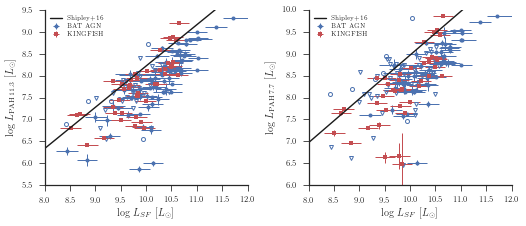

In [13]:
fig = plt.figure(figsize=(1.2*textwidth,1.2*3./8.*textwidth))
ax1 = fig.add_subplot(121)
pah11_3_detected = (df_lum['PAH 11.3'] >= 0) & (df_lum['PAH 11.3'] > 3*df_lum['PAH 11.3 err'])
lsf_detected = df_lum['lsf_flag'] == 0
both_detected_pah11_3 = pah11_3_detected & lsf_detected
pah11_3_only = pah11_3_detected & ~lsf_detected
lsf_only_pah11_3 = ~pah11_3_detected & lsf_detected
neither_pah11_3 = ~pah11_3_detected & ~lsf_detected
ms = 4
ax1.errorbar(df_lum['lsf'][both_detected_pah11_3], np.log10(df_lum['PAH 11.3'][both_detected_pah11_3]/3.846e33),
            xerr=np.vstack([df_lum['lsf_err_upper'][both_detected_pah11_3], df_lum['lsf_err_lower'][both_detected_pah11_3]]),
            yerr=0.434*df_lum['PAH 11.3 err'][both_detected_pah11_3]/df_lum['PAH 11.3'][both_detected_pah11_3], fmt='o',
            ls='None', color='b', label='BAT AGN', ms=ms, lw=1.0)
ax1.plot(df_lum['lsf'][pah11_3_only], np.log10(df_lum['PAH 11.3'][pah11_3_only]/3.846e33),
        marker='<', ms=ms, label='_nolabel', mfc='None', mec='b', ls='None', mew=1.0)
ax1.plot(df_lum['lsf'][lsf_only_pah11_3], np.log10(3*df_lum['PAH 11.3 err'][lsf_only_pah11_3]/3.846e33),
        marker='v', ls='None', ms=ms, mfc='None', mec='b', mew=1.0, label='_nolabel')
ax1.plot(df_lum['lsf'][neither_pah11_3], np.log10(3*df_lum['PAH 11.3 err'][neither_pah11_3]/3.846e33),
        marker='o', ls='None', ms=ms, mfc='None', mec='b', mew=1.0, label='_nolabel')
ax1.errorbar(kf_pahfit['lsf'], np.log10(kf_pahfit['PAH 11.3 lum']/3.846e33),
             xerr=np.vstack([kf_pahfit['lsf_err_up'], kf_pahfit['lsf_err_down']]),
             yerr=0.434*kf_pahfit['PAH 11.3 lum err']/kf_pahfit['PAH 11.3 lum'],
             color='r', fmt='s', ls='None', ms=ms, label='KINGFISH', lw=1.0)
ax1.set_xlabel('$\log\,L_{SF}$ [$L_{\odot}$]')
ax1.set_ylabel(r'$\log\,L_{\rm PAH\,11.3}$ [$L_{\odot}$]')

# Use the LPAH - LSF relation from Zakamska et al 2015 (based on work by Shi et al 2007)
# logLPAH_11.3 =  -0.7842 + 0.8759*log(LSF) both luminosities in solar luminosities
lsf = np.arange(7.5, 12.5, 0.001)
#lpah_zakam = -0.7842 + 0.8759*lsf
lpah11_3_shipley = ((lsf - np.log10(2.57e43) + np.log10(3.846e33)+44.14))/1.06 - np.log10(3.846e33)
ax1.plot(lsf, lpah11_3_shipley, 'k-', label='Shipley+16')
ax1.set_ylim(5.5, 9.5)
ax1.set_xlim(7.5, 12.0)

# Use the LPAH - SFR relation from Diamond-Stanic et al 2012: SFR = 9.6e-9*LPAH_11.3
# Use the LIR - SFR relation from Murphy et al 2011: SFR = LSF/2.57e43
# LPAH_11.3 = LSF/2.57e43/9.2e-9 with LSF in ergs/s and LPAH_11.3 in Lsun
lpah_dms = np.log10(10**lsf*3.846e33/2.57e43/9.6e-9)
#ax1.plot(lsf, lpah_dms, 'r-', label='Diamond-Stanic+12')
ax1.legend(loc='upper left', fontsize=6)
ax1.set_xlim(8.0, 12.0)

pah7_7_detected = (df_lum['PAH 7.7'] > 0) & (df_lum['PAH 7.7'] > 3*df_lum['PAH 7.7 err'])
both_detected_pah7_7 = pah7_7_detected & lsf_detected
pah7_7_only = pah7_7_detected & ~lsf_detected
lsf_only_pah7_7 = ~pah7_7_detected & lsf_detected
neither_pah7_7 = ~pah7_7_detected & ~lsf_detected

ax2 = fig.add_subplot(122)
ax2.errorbar(df_lum['lsf'][both_detected_pah7_7], np.log10(df_lum['PAH 7.7'][both_detected_pah7_7]/3.846e33),
            xerr=np.vstack([df_lum['lsf_err_upper'][both_detected_pah7_7], df_lum['lsf_err_lower'][both_detected_pah7_7]]),
            yerr=0.434*df_lum['PAH 7.7 err'][both_detected_pah7_7]/df_lum['PAH 7.7'][both_detected_pah7_7], fmt='o',
            ls='None', color='b', label='BAT AGN', ms=ms, lw=1.0)
ax2.plot(df_lum['lsf'][pah7_7_only], np.log10(df_lum['PAH 7.7'][pah7_7_only]/3.846e33),
        marker='<', ms=ms, label='_nolabel', mfc='None', mec='b', ls='None', mew=1.0)
ax2.plot(df_lum['lsf'][lsf_only_pah7_7], np.log10(3*df_lum['PAH 7.7 err'][lsf_only_pah7_7]/3.846e33),
        marker='v', ls='None', ms=ms, mfc='None', mec='b', mew=1.0, label='_nolabel')
ax2.plot(df_lum['lsf'][neither_pah7_7], np.log10(3*df_lum['PAH 7.7 err'][neither_pah7_7]/3.846e33),
        marker='o', ls='None', ms=ms, mfc='None', mec='b', mew=1.0, label='_nolabel')
ax2.errorbar(kf_pahfit['lsf'], np.log10(kf_pahfit['PAH 7.7 lum']/3.846e33),
             xerr=np.vstack([kf_pahfit['lsf_err_up'], kf_pahfit['lsf_err_down']]),
             yerr=0.434*kf_pahfit['PAH 7.7 lum err']/kf_pahfit['PAH 7.7 lum'],
             color='r', fmt='s', ls='None', ms=ms, label='KINGFISH', lw=1.0)
ax2.set_xlabel('$\log\,L_{SF}$ [$L_{\odot}$]')
ax2.set_ylabel(r'$\log\,L_{\rm PAH\,7.7}$ [$L_{\odot}$]')
ax2.set_xlim(8.0, 12.0)
ax2.set_ylim(6, 10)
lsf = np.arange(7.5, 12.5, 0.001)
lpah7 = np.log10(10**lsf*3.846e33/2.57e43/1.67e-9)
lpah7_v2 = 0.8195*lsf + 0.2372
lpah7_7_shipley = ((lsf - np.log10(2.57e43) + np.log10(3.846e33)+42.38)) - np.log10(3.846e33)
#ax2.plot(lsf, lpah7, 'r-', label='Roussel+01')
ax2.plot(lsf, lpah7_7_shipley, 'k-', label='Shipley+16')
ax2.legend(loc='upper left', fontsize=6)
sn.despine()

fig.subplots_adjust(wspace=0.3)
fig.savefig(figsave_dir+'lsf-vs-lpah.pdf', bbox_inches='tight')

No matter which relationship I use, it looks like for the BAT AGN, the SFR inferred from the IR luminosity is larger than the one inferred from the 11.3 micron PAH luminosity. 

## Comparison of PAH 7.7 micron luminosity and Star-Forming luminosity

We can do the same thing for the 7.7 micron luminosity and the star-forming luminosity. For this I'll use the conversion from PAH 7.7 micron luminosity to SFR from Roussel et al 2001 but updating it to a Kroupa IMF by dividing the conversion factor by 0.7.

Interestingly, it really depends on which conversion between the SFR and PAH 7.7 luminosity you use. Based on the linear relationship from Roussel et al 2001, we would conclude that almost all of the BAT AGN have LSF greater than LPAH 7.7 indicating a reduced abundance of PAHs. However if we use the flatter Shi et al 2007 relationship then the two luminosities agree quite well.

## Comparison between NeII and Star-forming Luminosity

The last comparison I want to make is between the NeII luminosity and the star-forming luminosity. In this case I expect there to not be a good correlation because it should depend on the amount of AGN contamination there is to the NeII emission. For the SFR-NeII relationship, I'll use the one from Diamond-Stanic et al 2012: SFR = 8.9e-8*LNeII

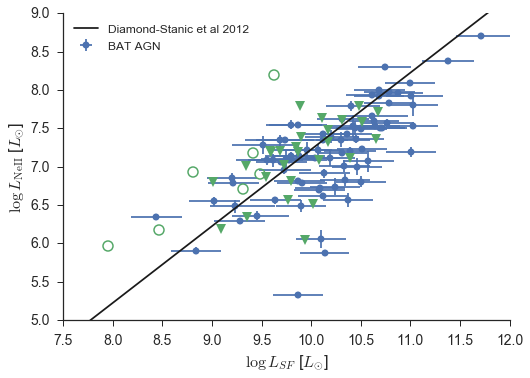

In [46]:
n2u = (df_lum['NeII'] < 0) | (df_lum['NeII'] < df_lum['NeII err'])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(df_lum['LSF'][~n2u], np.log10(df_lum['NeII'][~n2u].astype(np.float)/3.846e33),
             xerr=np.vstack([df_lum['LSF upper error'][~n2u], df_lum['LSF lower error'][~n2u]]),
             yerr=0.434*df_lum['NeII err'][~n2u]/df_lum['NeII'][~n2u],
             fmt='o', ls='None', color='b', label='BAT AGN')
ax.plot(df_lum['LSF'][n2u], np.log10(df_lum['NeII err'][n2u].astype(np.float)/3.846e33*3),
         'gv', ls='None', ms=10, label='_nolabel')
ax.plot(df_lum['LSF_upper_limit'][~n2u], np.log10(df_lum['NeII'][~n2u].astype(np.float)/3.846e33),
         'g<', ms=10, label='_nolabel')
ax.plot(df_lum['LSF_upper_limit'][n2u], np.log10(df_lum['NeII err'][n2u].astype(np.float)/3.846e33*3),
         'go', ms=10, mfc='None', mec='g', mew=1.5, label='_nolabel')

ax.set_xlabel('$\log\,L_{SF}$ [$L_{\odot}$]')
ax.set_ylabel(r'$\log\,L_{\rm NeII}$ [$L_{\odot}$]')

lsf = np.arange(7.5, 12.5, 0.001)
lneII = np.log10(10**lsf*3.846e33/2.57e43/8.9e-8)
ax.plot(lsf, lneII, 'k-', label='Diamond-Stanic et al 2012')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], labels[1:], loc='upper left', fontsize=12)
ax.set_xlim(7.5, 12.0)
ax.set_ylim(5.0, 9.0)
sn.despine()

For the NeII comparison the BAT AGN follow more closely the expected line assuming all NeII emission is produced in star-forming regions. However, I wonder if this is due contamination by the AGN to the NeII emission that is actually pulling the values up closer to the line when in fact they should mostly be below the line like for the PAH relationships. To test this, let's look at LNeII/LSF as a function of AGN fraction based on the SED fitting.

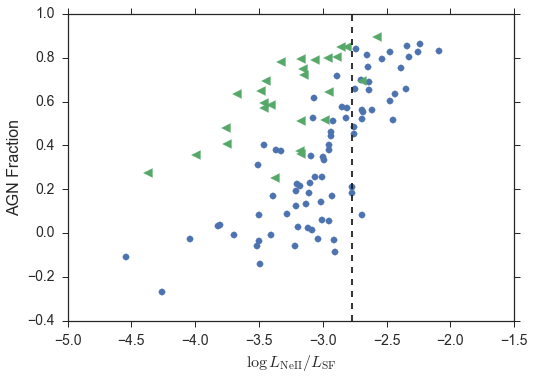

In [47]:
df_lum['agn_frac'] = bat_casey['agn_frac']
df_lum['agn_frac_upper_limit'] = bat_casey_undetected['agn_frac']
plt.scatter((np.log10(df_lum['NeII'].astype(np.float)/3.846e33) - df_lum['LSF'])[~n2u], df_lum['agn_frac'][~n2u],
            color='b', s=40)
plt.scatter((np.log10(df_lum['NeII err'].astype(np.float)/3.846e33) - df_lum['LSF'])[n2u], df_lum['agn_frac'][n2u],
            color='g', marker='<', s=80)
plt.scatter((np.log10(df_lum['NeII'].astype(np.float)/3.846e33) - df_lum['LSF_upper_limit'])[~n2u], df_lum['agn_frac_upper_limit'][~n2u],
            color='g', marker='o', s=80, facecolors='None', lw=1.5)

plt.axvline((lneII-lsf)[0], color='k', ls='--')
plt.xlabel(r'$\log\,L_{\rm NeII}/L_{\rm SF}$')
plt.ylabel('AGN Fraction')

This plots shows very clearly that the actual ratio between LNeII and LSF is smaller than what is given in Diamond-Stanic et al 2012. The ratio increases as the AGN fraction increases which is likely due to an increased contribution to the NeII emission by AGN heating. But weirdly at 0 AGN fraction, the ratio doesn't line up with what is expected from star-forming galaxies (dashed line from Diamond-Stanic et al 2012). Its at a much lower ratio by a factor of about 0.5 dex. 

I guess two things could be possible: 1) I'm somehow overestimating the star-forming luminosity or 2) There's intrinsically less NeII emission in AGN host galaxies. 

Curiously this 0.5 dex factor exactly matches with the correction factor I use to estimate the star-forming luminosity from the greybody luminosity.

To investigate this, I'm going to use the KINGFISH sample to test whether or not the correction factor is necessary and how well the relationship between LSF and NeII matches with the one from Diamond-Stanic et al 2012. I downloaded the PAH and NeII fits from Smith et al 2007 (Table 4).

In [48]:
# Upload KINGFISH data
kf_casey = pd.read_csv(casey_dir+'kingfish_beta_fixed_2_wturn_gaussianPrior/final_fit_results_kingfish_casey.csv', index_col=0)
kf_info = pd.read_table('/Users/ttshimiz/Dropbox/Research/Thesis/Other_surveys/KINGFISH/kingfish_data.txt', index_col=0, delimiter='\t')

# Identify the dwarf galaxies as any galaxy with stellar mass < 10^8 Msun
# Also identify the AGN in the sample
kf_dwarfs = kf_info['Mstar'] < 8.0
kf_agn = (kf_info['Nuc. Type'] == 'AGN') | (kf_info['Nuc. Type'] == 'SF/AGN')
kf_casey['Mstar'] = kf_info['Mstar']

# PAHFIT results from Smith et al 2007
kf_pahfit = pd.read_csv('/Users/ttshimiz/Dropbox/Research/Thesis/Other_surveys/KINGFISH/kingfish_pahfit_intensities.csv', index_col=0)
kf_pahfit_aperture = pd.read_table('/Users/ttshimiz/Dropbox/Research/Thesis/Other_surveys/KINGFISH/kingfish_spitzer_extraction_apertures.txt', index_col=0, delimiter='\t')
kf_pahfit.index = [''.join(x.split()) for x in kf_pahfit.index]
kf_pahfit_aperture.index = [''.join(x.split()) for x in kf_pahfit_aperture.index]

In [49]:
# Need to pull out the major and minor axis sizes for the Spitzer/IRS extraction aperture
kf_pahfit_aperture['Major Axis'] = pd.Series(index=kf_pahfit_aperture.index)
kf_pahfit_aperture['Minor Axis'] = pd.Series(index=kf_pahfit_aperture.index)

for n in kf_pahfit_aperture.index:
    s = kf_pahfit_aperture.loc[n, 'Aperture Size']
    kf_pahfit_aperture.loc[n, 'Major Axis'] = np.float(s.split()[0])
    kf_pahfit_aperture.loc[n, 'Minor Axis'] = np.float(s.split()[-1])

In [52]:
# Calculate the NeII luminosity for the KINGFISH galaxies
kf_pahfit['NeII lum'] = (4*np.pi*(kf_info['Dist [Mpc]']*10**6*3.09e16)**2*kf_pahfit['NeII']*10**7*np.pi*
                         kf_pahfit_aperture['Major Axis']*kf_pahfit_aperture['Minor Axis']/4.25e10)

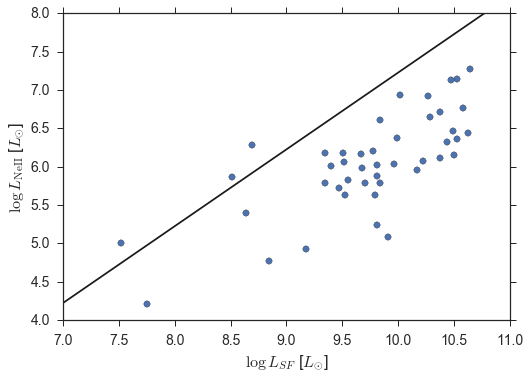

In [53]:
# Plot the NeII luminosity against the star-forming luminosity
kf_pahfit['LSF'] = kf_casey['lir_total']

plt.scatter(kf_pahfit['LSF'], np.log10(kf_pahfit['NeII lum']/3.846e33), c='b', s=40)

lsf = np.arange(7.0, 12.5, 0.001)
lneII = np.log10(10**lsf*3.846e33/2.57e43/8.9e-8)
plt.plot(lsf, lneII, 'k-')
plt.xlim(7.0, 11.0)
plt.ylim(4.0, 8.0)
plt.xlabel('$\log\,L_{SF}$ [$L_{\odot}$]')
plt.ylabel(r'$\log\,L_{\rm NeII}$ [$L_{\odot}$]')

So it looks like the relationship from Diamond-Stanic DOES NOT work for the KINGFISH galaxies. Before defining a new relationship, I'll just plot the BAT AGN on top of the KINGFISH galaxies to see where they lie.

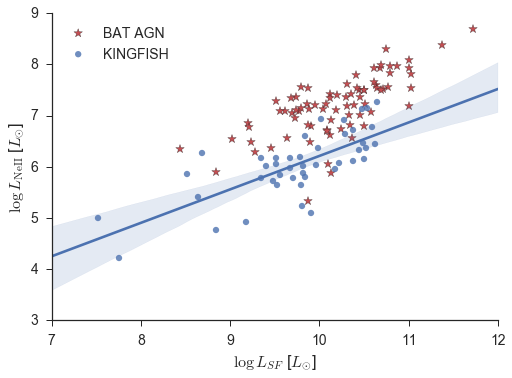

In [55]:
plt.scatter(df_lum['LSF'][~n2u], np.log10(df_lum['NeII'][~n2u].astype(np.float)/3.846e33),
            label='BAT AGN', c='r', s=80, marker='*')
sn.regplot(kf_pahfit['LSF'], np.log10(kf_pahfit['NeII lum']/3.846e33),
           scatter_kws={"s":40, "c":'b', 'marker':'o'}, label='KINGFISH')
plt.xlabel('$\log\,L_{SF}$ [$L_{\odot}$]')
plt.ylabel(r'$\log\,L_{\rm NeII}$ [$L_{\odot}$]')
plt.legend(loc='upper left')
sn.despine()

Clearly the BAT AGN lie well above the LSF-LNeII relationship defined by the KINGFISH galaxies. 

This makes me wonder now what the relationship between LPAH and LSF looks like for the KINGFISH galaxies.

In [56]:
# Calculate the PAH 11.3 luminosity for the KINGFISH galaxies
kf_pahfit['PAH 11.3 lum'] = (4*np.pi*(kf_info['Dist [Mpc]']*10**6*3.09e16)**2*kf_pahfit['PAH 11.3']*10**7*np.pi*
                             kf_pahfit_aperture['Major Axis']*kf_pahfit_aperture['Minor Axis']/4.25e10)

(6, 10)

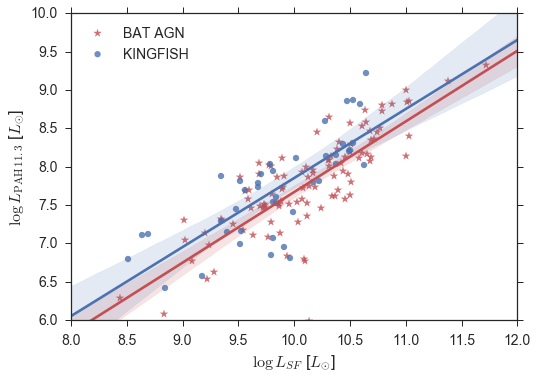

In [57]:
kf_pahfit['Dwarf'] = kf_dwarfs
sn.regplot(df_lum['LSF'][~pah11_undetected], np.log10(df_lum['PAH 11.3'][~pah11_undetected].astype(np.float)/3.846e33),
            label='BAT AGN',scatter_kws={"s":80}, color='r', marker='*')
sn.regplot(kf_pahfit['LSF'][~kf_pahfit['Dwarf'].astype(np.bool)], np.log10(kf_pahfit['PAH 11.3 lum'][~kf_pahfit['Dwarf'].astype(np.bool)]/3.846e33), scatter_kws={"s":40, "c":'b', 'marker':'o'}, label='KINGFISH')

lsf = np.arange(7.5, 12.5, 0.001)
lpah = -0.7842 + 0.8759*lsf
#plt.plot(lsf, lpah, 'k-')
plt.xlabel('$\log\,L_{SF}$ [$L_{\odot}$]')
plt.ylabel(r'$\log\,L_{\rm PAH\,11.3}$ [$L_{\odot}$]')
plt.legend(loc='upper left')
plt.xlim(8, 12)
plt.ylim(6, 10)

Here its quite clear that for both the KINGFISH galaxies and the BAT AGN, the PAH 11.3 micron luminosity follows the star-forming luminosity. There's maybe some evidence that the BAT AGN lie below the KINGFISH relationship, but its not very strong. This is a strong indication that either the PAH 11.3 micron luminosity in AGN can be used as a SFR indicator or we have decomposed the SED pretty well, whichever we choose to assume is the "true" SFR indicator.

Let's take a quick look at the 7.7 micron luminosity.

In [58]:
# Calculate the PAH 7.7 luminosity for the KINGFISH galaxies
kf_pahfit['PAH 7.7 lum'] = (4*np.pi*(kf_info['Dist [Mpc]']*10**6*3.09e16)**2*kf_pahfit['PAH 7.7']*10**7*
                            np.pi*kf_pahfit_aperture['Major Axis']*kf_pahfit_aperture['Minor Axis']/4.25e10)

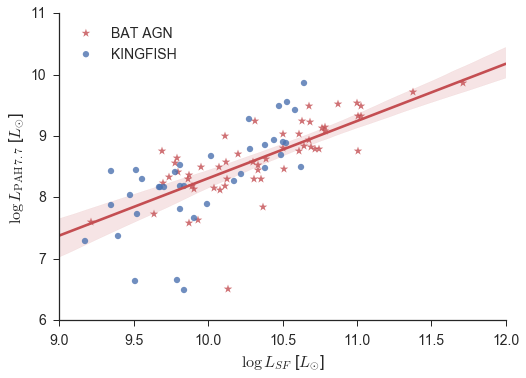

In [60]:
sn.regplot(df_lum['LSF'][~p7u], np.log10(df_lum['PAH 7.7'][~p7u].astype(np.float)/3.846e33),
            label='BAT AGN',scatter_kws={"s":80}, color='r', marker='*')
sn.regplot(kf_pahfit['LSF'][~kf_pahfit['Dwarf'].astype(np.bool)],
           np.log10(kf_pahfit['PAH 7.7 lum'][~kf_pahfit['Dwarf'].astype(np.bool)]/3.846e33),
           scatter_kws={"s":40, "c":'b', 'marker':'o'}, label='KINGFISH')

lsf = np.arange(7.5, 12.5, 0.001)
lpah = -0.7842 + 0.8759*lsf
#plt.plot(lsf, lpah, 'k-')
plt.xlabel('$\log\,L_{SF}$ [$L_{\odot}$]')
plt.ylabel(r'$\log\,L_{\rm PAH\,7.7}$ [$L_{\odot}$]')
plt.legend(loc='upper left')
sn.despine()

Again the PAH 7.7 micron luminosity and LSF in the BAT AGN is following the same relationship as the KINGFISH galaxies. This combined with the result from the PAH 11.3 micron luminosity shows that the LSF that we've calculated is approximating the SFR quite well.  

I now want to turn my attention to indicators of the AGN luminosity. These are NeIII, OIV, and NeV emission. But first I want to go back to the LSF-vs-LNeII relationship for the BAT AGN.

Let's replot the LSF/LNeII ratio vs AGN fraction, now including the KINGFISH galaxies.

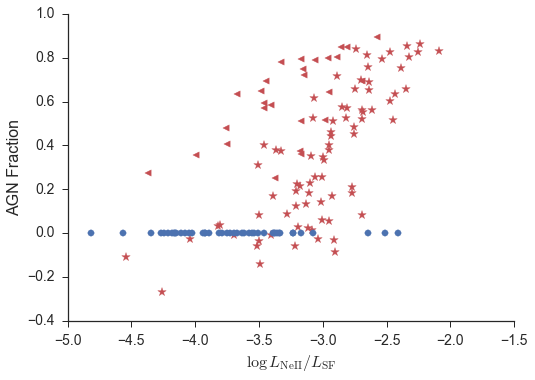

In [65]:
df_lum['agn_frac_upper_limit'] = bat_casey_undetected['agn_frac']
plt.scatter((np.log10(df_lum['NeII'].astype(np.float)/3.846e33) - df_lum['LSF'])[~n2u], df_lum['agn_frac'][~n2u],
            color='r', marker='*', s=80)
plt.scatter((np.log10(df_lum['NeII err'].astype(np.float)/3.846e33) - df_lum['LSF'])[n2u],
            df_lum['agn_frac'][n2u], color='r', marker='<', s=40)
plt.scatter((np.log10(df_lum['NeII'].astype(np.float)/3.846e33) - df_lum['LSF_upper_limit'])[~n2u],
            df_lum['agn_frac_upper_limit'][~n2u], color='r', marker='o', s=80, facecolors='None', lw=1.5)

plt.scatter(np.log10(kf_pahfit['NeII lum']/3.846e33)-kf_pahfit['LSF'], np.zeros(len(kf_pahfit)),
            color='b', marker='o', s=40)
plt.xlabel(r'$\log\,L_{\rm NeII}/L_{\rm SF}$')
plt.ylabel('AGN Fraction')
sn.despine()

This is interesting because at 0 AGN fraction the BAT AGN still don't have the same ratio of the star-forming luminosity to NeII luminosity. Is this an indication that even when the AGN isn't contaminating the broadband SED, it's still exciting NeII ions? We need to be careful though with this plot because LSF is essentially in both the x and y axis. Also I wonder if the fact that the KINGFISH galaxies are so close has anything to do with it? Perhaps the IRS spectra are missing a significant fraction of the NeII emission. This should be something we take a closer look at because I'm not sure if I believe the big difference between BAT AGN and KINGFISH galaxies.

##Comparison between OIV and X-ray luminosity

In [66]:
df_lum['LBAT'] = bat_flux['lbat']

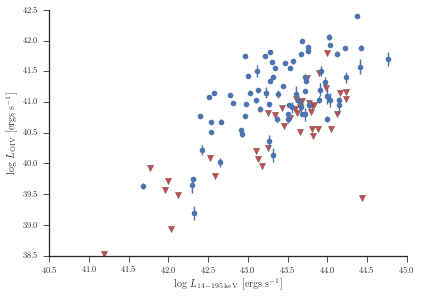

In [70]:
oiv_undetected = (df_lum['OIV'] < 0) | (df_lum['OIV'] < 3*df_lum['OIV err'])
plt.errorbar(df_lum['LBAT'][~oiv_undetected], np.log10(df_lum['OIV'][~oiv_undetected].astype(np.float)),
             yerr=(0.434*df_lum['OIV err']/df_lum['OIV'])[~oiv_undetected].astype(np.float), fmt='o', ls='None')
plt.scatter(df_lum['LBAT'][oiv_undetected], np.log10(df_lum['OIV err'][oiv_undetected].astype(np.float)*3.),
            marker='v', c='r', s=40)
plt.xlabel(r'$\log\,L_{\rm 14-195\,keV}$ [ergs s$^{-1}$]')
plt.ylabel(r'$\log\,L_{\rm OIV}$ [ergs s$^{-1}$]')
plt.ylim(38.5, 42.5)
sn.despine()

Looks like a decent correlation, however there is a lot of scatter between OIV and 14-195 keV luminosity. It also looks like it sort of flattens out at high luminosity. Let's look at the OIV luminosity as a function of the AGN fraction.

(38.5, 42.5)

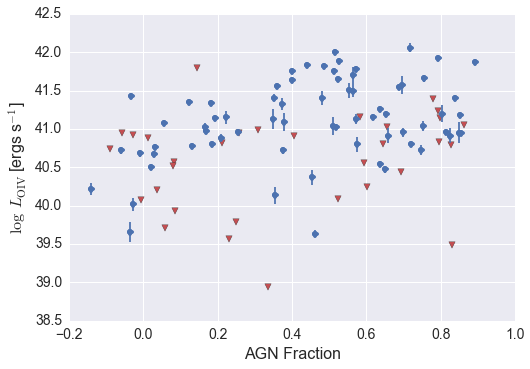

In [236]:
plt.errorbar(df_lum['agn_frac'][~oiv_undetected], np.log10(df_lum['OIV'][~oiv_undetected].astype(np.float)),
             yerr=(0.434*df_lum['OIV err']/df_lum['OIV'])[~oiv_undetected].astype(np.float), fmt='o', ls='None')
plt.scatter(df_lum['agn_frac'][oiv_undetected], np.log10(df_lum['OIV err'][oiv_undetected].astype(np.float)*3.),
            marker='v', c='r', s=40)
plt.xlabel(r'AGN Fraction')
plt.ylabel(r'$\log\,L_{\rm OIV}$ [ergs s$^{-1}$]')
plt.ylim(38.5, 42.5)

Interestingly no correlation at all between the OIV luminosity and IR AGN fraction. I thought maybe most of the OIV detections would be at a high AGN fraction, but that doesn't seem to be the case. Let's look at the correlation with the star-forming luminosity, shouldn't be one.

(38.5, 42.5)

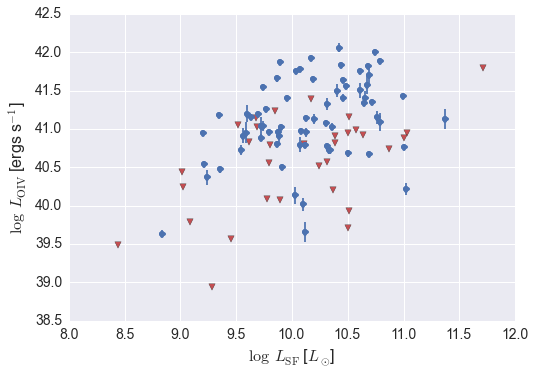

In [238]:
plt.errorbar(df_lum['LSF'][~oiv_undetected], np.log10(df_lum['OIV'][~oiv_undetected].astype(np.float)),
             yerr=(0.434*df_lum['OIV err']/df_lum['OIV'])[~oiv_undetected].astype(np.float), fmt='o', ls='None')
plt.scatter(df_lum['LSF'][oiv_undetected], np.log10(df_lum['OIV err'][oiv_undetected].astype(np.float)*3.),
            marker='v', c='r', s=40)
plt.xlabel(r'$\log\,L_{\rm SF}$ [$L_{\odot}$]')
plt.ylabel(r'$\log\,L_{\rm OIV}$ [ergs s$^{-1}$]')
plt.ylim(38.5, 42.5)

Not a really strong correlation. The slight positive one is likely just due to the shared correlation with distance. Finally let's look at the correlation with the AGN-related IR luminosity.

In [242]:
df_lum['Lpowlaw'] = bat_casey['lir_powlaw']
df_lum['LAGN_IR'] = bat_casey['lir_total'] + np.log10(bat_casey['agn_frac'])

(38.5, 42.5)

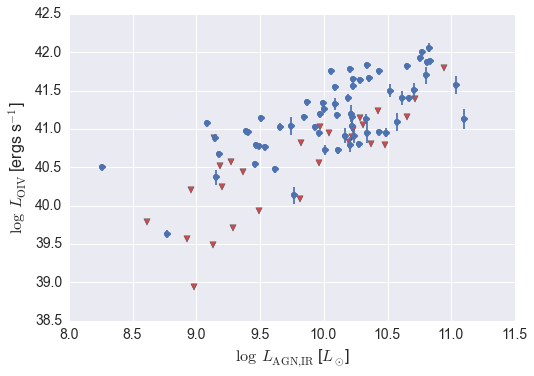

In [244]:
plt.errorbar(df_lum['LAGN_IR'][~oiv_undetected], np.log10(df_lum['OIV'][~oiv_undetected].astype(np.float)),
             yerr=(0.434*df_lum['OIV err']/df_lum['OIV'])[~oiv_undetected].astype(np.float), fmt='o', ls='None')
plt.scatter(df_lum['LAGN_IR'][oiv_undetected], np.log10(df_lum['OIV err'][oiv_undetected].astype(np.float)*3.),
            marker='v', c='r', s=40)
plt.xlabel(r'$\log\,L_{\rm AGN,IR}$ [$L_{\odot}$]')
plt.ylabel(r'$\log\,L_{\rm OIV}$ [ergs s$^{-1}$]')
plt.ylim(38.5, 42.5)

Here we find the strongest correlation between any of the luminosities and the OIV luminosity. This makes sense since the MIR continuum emission related to the AGN should be more correlated with the OIV emission than the X-ray emission which comes from very close to the AGN.

##Comparison between NeV and X-ray Luminosity

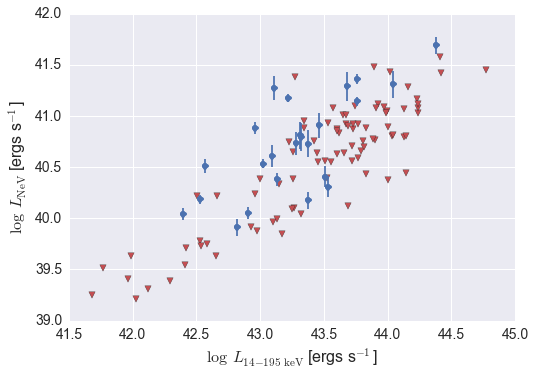

In [246]:
neV_undetected = (df_lum['NeV'] < 0) | (df_lum['NeV'] < 3*df_lum['NeV err'])
plt.errorbar(np.log10(df_lum['LBAT'][~neV_undetected]), np.log10(df_lum['NeV'][~neV_undetected].astype(np.float)),
             yerr=(0.434*df_lum['NeV err']/df_lum['NeV'])[~neV_undetected].astype(np.float), fmt='o', ls='None')
plt.scatter(np.log10(df_lum['LBAT'][neV_undetected]), np.log10(df_lum['NeV err'][neV_undetected].astype(np.float)*3.),
            marker='v', c='r', s=40)
plt.xlabel(r'$\log\,L_{\rm 14-195\,keV}$ [ergs s$^{-1}$]')
plt.ylabel(r'$\log\,L_{\rm NeV}$ [ergs s$^{-1}$]')

Of the few sources that have NeV actually detected, it looks like it follows a reasonable relationship with the X-ray luminosity. Even the upper limits follow a nice relationship with the BAT luminosity.

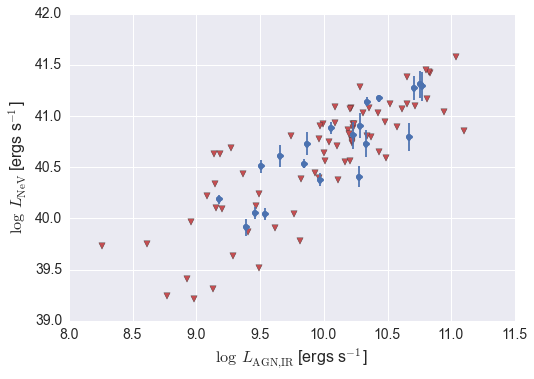

In [249]:
plt.errorbar(df_lum['LAGN_IR'][~neV_undetected], np.log10(df_lum['NeV'][~neV_undetected].astype(np.float)),
             yerr=(0.434*df_lum['NeV err']/df_lum['NeV'])[~neV_undetected].astype(np.float), fmt='o', ls='None')
plt.scatter(df_lum['LAGN_IR'][neV_undetected], np.log10(df_lum['NeV err'][neV_undetected].astype(np.float)*3.),
            marker='v', c='r', s=40)
plt.xlabel(r'$\log\,L_{\rm AGN,IR}$ [ergs s$^{-1}$]')
plt.ylabel(r'$\log\,L_{\rm NeV}$ [ergs s$^{-1}$]')

And just like for the OIV emission, the NeV emission is more correlated with the IR AGN luminosity rather than the X-ray luminosity.